In [37]:
%matplotlib inline
import math
import numpy as np
import scipy.io
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

In [3]:
cd ../

/Users/darioml/src/fyp


In [4]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

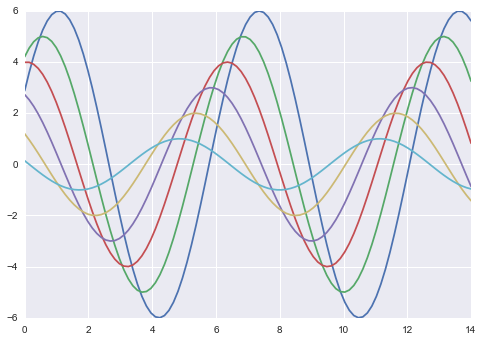

In [4]:
sinplot()

In [5]:
def setup():
    sns.set_style("ticks", {'axes.edgecolor': '.15',
     'axes.grid': True,
     'axes.labelcolor': '.15',
     'axes.linewidth': 1.5,
     'xtick.major.size': 6.0,
     'xtick.minor.size': 3.0,
     'ytick.major.size': 6.0,
     'ytick.minor.size': 3.0})
    
#     flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
#     flatui = ["#3498db", "#9b59b6", "#2ecc71", "#34495e", "#95a5a6", "#e74c3c"]
    flatui = ["#2980b9", "#e74c3c", "#34495e", "#27ae60", "#9b59b6", "#95a5a6"]
    
    sns.set_palette(sns.color_palette(flatui))

In [6]:
def dario_plot_v1(plt_fnc, filename, title="", xlabel="", ylabel=""): 
    sns.set_context("paper", font_scale=1.5)
    plt.figure(figsize=(8, 3.5))
    plt_fnc()
    sns.despine()
    
#     plt.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
#     plt.rc('text', usetex=True)
    
    plt.suptitle(title, fontsize=18)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.savefig('/Users/darioml/src/fyp/results/figures/'+filename+'_1.pdf', format='pdf', bbox_inches='tight')
    plt.close()
    
    sns.set_context("poster", font_scale=2.6, rc={"lines.linewidth": 4.5})
    plt_fnc()
    sns.despine()
    plt.savefig('/Users/darioml/src/fyp/results/figures/'+filename+'_2.pdf', format='pdf', bbox_inches='tight') 
    plt.close()
    
    sns.set_context("notebook", font_scale=3.5, rc={"lines.linewidth": 4})
    plt_fnc()
    sns.despine()
    plt.savefig('/Users/darioml/src/fyp/results/figures/'+filename+'_3.pdf', format='pdf', bbox_inches='tight') 
    plt.close()
    
    sns.set_context("notebook")
    
dario_plot_v1(sinplot, 'temporary', 'title', 'xlabel', 'ylabel')

In [7]:
setup()

In [8]:
def dario_plot_v2(plt_fnc, filename, title="", xlabel="", ylabel="", legend=None): 
    def make_plot(nbins=None, yoff=1.0):
        plt_fnc()  
        sns.despine()
        # plt.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
        # plt.rc('text', usetex=True)
        plt.suptitle(title, fontsize=15, y=yoff)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        if nbins is not None:
            plt.locator_params(nbins=nbins, tight=True)
        if legend is not None:
            leg = plt.legend(legend,frameon=True)
            leg.get_frame().set_alpha(0.7)

            
    sns.set_context("paper", font_scale=1.5)
    plt.figure(figsize=(8, 3.5))
    make_plot()
    plt.savefig('/Users/darioml/src/fyp/results/figures/'+filename+'_1.pdf', format='pdf', bbox_inches='tight')
    plt.close()
    
    # sns.set_context("poster", font_scale=2.6, rc={"lines.linewidth": 4.5})
    plt.figure(figsize=(4, 1.75))
    make_plot(yoff=1.08)
    plt.savefig('/Users/darioml/src/fyp/results/figures/'+filename+'_2.pdf', format='pdf', bbox_inches='tight') 
    plt.close()
    
    # sns.set_context("notebook", font_scale=3.5, rc={"lines.linewidth": 4})
    plt.figure(figsize=(2.6, 1.75))
    make_plot(yoff=1.08, nbins=7)
    plt.savefig('/Users/darioml/src/fyp/results/figures/'+filename+'_3.pdf', format='pdf', bbox_inches='tight') 
#     plt.close()
    
    # cleanup
    sns.set_context("notebook")

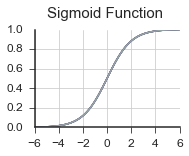

In [12]:
def sigmoid():
    x = np.linspace(-6, 6, 100)
    for i in range(1, 7):
        plt.plot(x, 1 / ( 1 + np.exp(-x) ) )
        
dario_plot_v2(sigmoid, 'sigmoid_2', 'Sigmoid Function')

{'index': array([[  10,   20,   50,  200,  500,  800, 1000, 1500, 2000]]), 'no_hidden_nodes': array([[20]]), '__globals__': [], '__header__': 'MATLAB 5.0 MAT-file Platform: posix, Created on: Sun Jun 14 15:23:04 2015', 'times': array([[  0.82168789,   1.57054063,   3.80429063,  14.9532446 ,
         26.24239531,  25.45710123,  24.78033428,  25.04587234,
         26.87124362]]), 'no_iteration': array([[20]]), '__version__': '1.0', 'accuracy': array([[ 0.35523077,  0.40784615,  0.61384615,  0.73184615,  0.73369231,
         0.71815385,  0.73476923,  0.73092308,  0.73030769]])}


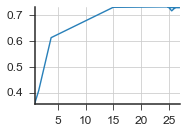

In [18]:
data = scipy.io.loadmat('results/20150614-143313_backprop_maxiter.mat')
print data
dario_plot_v2(lambda: plt.plot(data['times'][0], data['accuracy'][0]), 'testing', '')

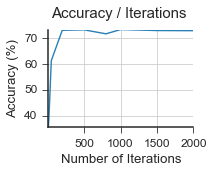

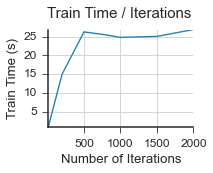

In [22]:
data = scipy.io.loadmat('results/20150614-143313_backprop_maxiter.mat')
dario_plot_v2(lambda: plt.plot(data['index'][0], 100*data['accuracy'][0]), 'backprop_maxiter_acc',
          'Accuracy / Iterations', 'Number of Iterations', 'Accuracy (%)')
dario_plot_v2(lambda: plt.plot(data['index'][0], data['times'][0]), 'backprop_maxiter_time',
          'Train Time / Iterations', 'Number of Iterations', 'Train Time (s)')

{'index': array([[15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35]]), 'max_iteration': array([[500]]), '__globals__': [], '__header__': 'MATLAB 5.0 MAT-file Platform: posix, Created on: Sun Jun 14 16:19:32 2015', 'times': array([[ 23.07489258,  24.75878632,  22.76388729,  25.33733569,
         29.35947732,  28.34476266,  30.61697663,  33.3677241 ,
         31.54674177,  32.11346834,  33.6433355 ]]), 'no_iteration': array([[20]]), '__version__': '1.0', 'accuracy': array([[ 0.71984615,  0.736     ,  0.74215385,  0.74446154,  0.73507692,
         0.74846154,  0.75107692,  0.75584615,  0.73446154,  0.74015385,
         0.746     ]])}


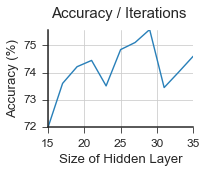

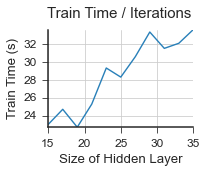

In [19]:
data = scipy.io.loadmat('results/20150614-143432_backprop_hiddennodes.mat')
print data
dario_plot_v2(lambda: plt.plot(data['index'][0], 100*data['accuracy'][0]), 'backprop_hiddennodes_acc',
          'Accuracy / Iterations', 'Size of Hidden Layer', 'Accuracy (%)')
dario_plot_v2(lambda: plt.plot(data['index'][0], data['times'][0]), 'backprop_hiddennodes_time',
          'Train Time / Iterations', 'Size of Hidden Layer', 'Train Time (s)')

[u'[0,1]   ' u'[0, 255]' u'[-1,1]  ']


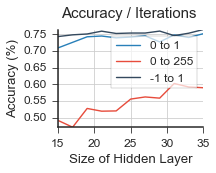

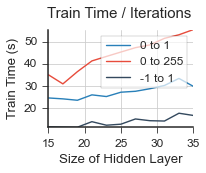

In [21]:
data = scipy.io.loadmat('results/20150614-143442_backprop_data_format.mat')
# print data['legend']
# print data['no_iteration'][0]
dario_plot_v2(lambda: plt.plot(data['index'][0], data['accuracy'].T), 'backprop_data_format_acc',
          'Accuracy / Iterations', 'Size of Hidden Layer', 'Accuracy (%)',['0 to 1','0 to 255','-1 to 1'])
dario_plot_v2(lambda: plt.plot(data['index'][0], data['times'].T), 'backprop_data_format_time',
          'Train Time / Iterations', 'Size of Hidden Layer', 'Train Time (s)',['0 to 1','0 to 255','-1 to 1'])

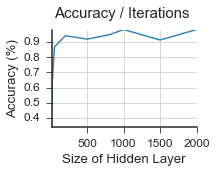

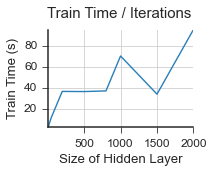

In [23]:
data = scipy.io.loadmat('results/20150615-055825_backprop_2img_dir_iters.mat')
dario_plot_v2(lambda: plt.plot(data['max_iteration'][0], data['accuracy'][:,1]), 'backprop_2img_dir_iters',
          'Accuracy / Iterations', 'Size of Hidden Layer', 'Accuracy (%)')
dario_plot_v2(lambda: plt.plot(data['max_iteration'][0], data['times'][:,1]), 'backprop_2img_dir_iters',
          'Train Time / Iterations', 'Size of Hidden Layer', 'Train Time (s)')

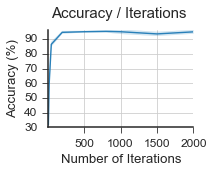

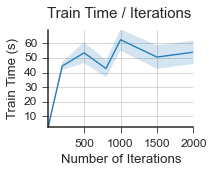

In [58]:
data = scipy.io.loadmat('results/20150615-055825_backprop_2img_dir_iters.mat')
# gammas = sns.load_dataset("gammas")
# print sns.load_dataset("gammas")
# print data['max_iteration'][0]
# print data['accuracy'].T
step = pd.Series(data['max_iteration'][0], name="max iterations")

# sns.tsplot(data['times'].T, time=step)

dario_plot_v2(lambda: sns.tsplot(100*data['accuracy'].T, time=step), 'backprop_2img_dir_iters_acc',
          'Accuracy / Iterations', 'Number of Iterations', 'Accuracy (%)')
dario_plot_v2(lambda: sns.tsplot(data['times'].T, time=step), 'backprop_2img_dir_iters_times',
          'Train Time / Iterations', 'Number of Iterations', 'Train Time (s)')

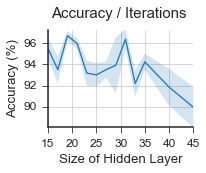

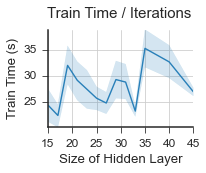

In [57]:
data = scipy.io.loadmat('results/20150615-055828_backprop_2img_dir_nodes.mat')

step = pd.Series(data['index'][0])

# sns.tsplot(data['times'].T, time=step)

dario_plot_v2(lambda: sns.tsplot(100*data['accuracy'].T, time=step), 'backprop_2img_dir_nodes_acc',
          'Accuracy / Iterations', 'Size of Hidden Layer', 'Accuracy (%)')
dario_plot_v2(lambda: sns.tsplot(data['times'].T, time=step), 'backprop_2img_dir_nodes_times',
          'Train Time / Iterations', 'Size of Hidden Layer', 'Train Time (s)')

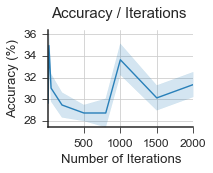

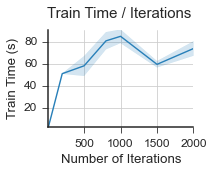

In [56]:
data = scipy.io.loadmat('results/20150615-055832_backprop_2img_speed_iters.mat')

step = pd.Series(data['max_iteration'][0])

dario_plot_v2(lambda: sns.tsplot(100*data['accuracy'].T, time=step), 'backprop_2img_speed_iters_acc',
          'Accuracy / Iterations', 'Number of Iterations', 'Accuracy (%)')
dario_plot_v2(lambda: sns.tsplot(data['times'].T, time=step), 'backprop_2img_speed_iters_times',
          'Train Time / Iterations', 'Number of Iterations', 'Train Time (s)')

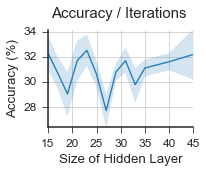

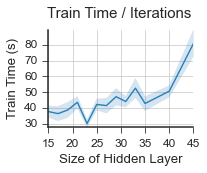

In [55]:
data = scipy.io.loadmat('results/20150615-055833_backprop_2img_speed_nodes.mat')

step = pd.Series(data['nodes'][0])

dario_plot_v2(lambda: sns.tsplot(100*data['accuracy'].T, time=step), 'backprop_2img_speed_nodes_acc',
          'Accuracy / Iterations', 'Size of Hidden Layer', 'Accuracy (%)')
dario_plot_v2(lambda: sns.tsplot(data['times'].T, time=step), 'backprop_2img_speed_nodes_times',
          'Train Time / Iterations', 'Size of Hidden Layer', 'Train Time (s)')

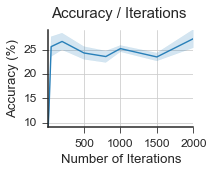

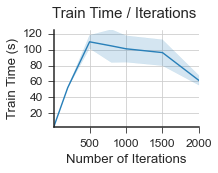

In [54]:
data = scipy.io.loadmat('results/20150615-055815_backprop_2img_both_iters.mat')

step = pd.Series(data['max_iteration'][0])

dario_plot_v2(lambda: sns.tsplot(100*data['accuracy'].T, time=step), 'backprop_2img_both_iters_acc',
          'Accuracy / Iterations', 'Number of Iterations', 'Accuracy (%)')
dario_plot_v2(lambda: sns.tsplot(data['times'].T, time=step), 'backprop_2img_both_iters_times',
          'Train Time / Iterations', 'Number of Iterations', 'Train Time (s)')

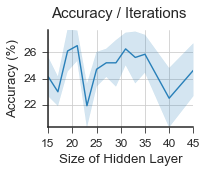

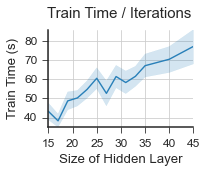

In [53]:
data = scipy.io.loadmat('results/20150615-055817_backprop_2img_both_nodes.mat')

step = pd.Series(data['nodes'][0])

dario_plot_v2(lambda: sns.tsplot(100*data['accuracy'].T, time=step), 'backprop_2img_both_nodes_acc',
          'Accuracy / Iterations', 'Size of Hidden Layer', 'Accuracy (%)')
dario_plot_v2(lambda: sns.tsplot(data['times'].T, time=step), 'backprop_2img_both_nodes_times',
          'Train Time / Iterations', 'Size of Hidden Layer', 'Train Time (s)')